# Tiền xử lý dữ liệu

In [1]:
#Cài đặt Gdown thông qua pip. Gdown giúp chúng ta download file có dung lượng lớn từ Google Drive bằng giao diện dòng lệnh.

!pip uninstall gdown -y && pip install gdown 

Found existing installation: gdown 4.4.0
Uninstalling gdown-4.4.0:
  Successfully uninstalled gdown-4.4.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.3-py3-none-any.whl size=14841 sha256=221d38f64b55ae23e3d24cdd926a07444062c5f9496c8d075b5c7d21a30180f6
  Stored in directory: /root/.cache/pip/wheels/94/8d/0b/bdcd83555c3555f91a33f6c2384428d9f163c7d75ab0d272b4
Successfully built gdown


In [2]:
#Tạo thư mục dataset. Truy cấp danh sách thư mục. Download thông tin từ folder trong link ra từng file csv trong /content/dataset

!rmdir dataset
!mkdir dataset

!gdown --folder https://drive.google.com/drive/folders/1orhE_YBJiT3uFLDm-M6Glz14RmVZeCqT -O /content/dataset

rmdir: failed to remove 'dataset': No such file or directory
Retrieving folder list
Processing file 1NSXTBTE6LUun-fpEIX2sqzsmkd6ZHAQ4 train.csv
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1NSXTBTE6LUun-fpEIX2sqzsmkd6ZHAQ4
To: /content/dataset/train.csv
100% 2.13M/2.13M [00:00<00:00, 228MB/s]
Download completed


In [3]:
# Import một số thư viện cần thiết

import numpy as np #đại số tuyến tính
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Khi sử dụng module pylot trong thư viện matplotlib chúng ta sẽ import vào với tên ngắn gọn là plt.

import time #import modul time để xử lý các tác vụ liên quan đến thời gian
import math #import modul math để xác định các hàm khác nhau giúp nhiệm vụ của chúng ta dễ dàng hơn 
import datetime #import modul datatime để làm việc với ngày tháng và thời gian

# Import widgets
from ipywidgets import widgets, interactive, interact
import ipywidgets as widgets
from IPython.display import display

from math import log, floor
from sklearn.neighbors import KDTree

import seaborn as sns
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import pywt
from statsmodels.robust import mad

import scipy
import statsmodels
from scipy import signal

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

import itertools
from itertools import cycle
plt.style.use('seaborn')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/dataset/train.csv


In [4]:
#Đọc tệp csv

df=pd.read_csv('/content/dataset/train.csv')

In [5]:
#In ra 5 dòng đầu

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
#In ra 5 dòng cuối

df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [7]:
#Tạo ra 10 mẫu ngẫu nhiên

df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
4573,4574,CA-2017-139395,12/12/2017,18/12/2017,Standard Class,MG-17650,Matthew Grinstein,Home Office,United States,Jackson,Michigan,49201.0,Central,TEC-PH-10002103,Technology,Phones,Jabra SPEAK 410,657.930
3351,3352,US-2015-134733,23/09/2015,28/09/2015,Standard Class,BM-11650,Brian Moss,Corporate,United States,San Diego,California,92037.0,West,FUR-BO-10002916,Furniture,Bookcases,"Rush Hierlooms Collection 1"" Thick Stackable B...",435.999
2746,2747,CA-2015-155887,12/05/2015,17/05/2015,Standard Class,KT-16480,Kean Thornton,Consumer,United States,Franklin,Massachusetts,2038.0,East,FUR-TA-10002228,Furniture,Tables,"Bevis Traditional Conference Table Top, Plinth...",700.056
4590,4591,CA-2017-129868,26/12/2017,31/12/2017,Standard Class,MC-18130,Mike Caudle,Corporate,United States,Los Angeles,California,90004.0,West,OFF-SU-10000952,Office Supplies,Supplies,Fiskars Home & Office Scissors,17.760
1940,1941,CA-2017-112109,08/07/2017,12/07/2017,Standard Class,JE-15715,Joe Elijah,Consumer,United States,Broomfield,Colorado,80020.0,West,FUR-CH-10004287,Furniture,Chairs,SAFCO Arco Folding Chair,662.880
7894,7895,CA-2018-124744,21/06/2018,25/06/2018,Standard Class,EH-14125,Eugene Hildebrand,Home Office,United States,Wheeling,West Virginia,26003.0,East,OFF-BI-10002852,Office Supplies,Binders,Ibico Standard Transparent Covers,82.400
6939,6940,CA-2018-107132,26/06/2018,30/06/2018,Standard Class,SC-20260,Scott Cohen,Corporate,United States,New York City,New York,10009.0,East,OFF-BI-10001071,Office Supplies,Binders,GBC ProClick Punch Binding System,102.368
2205,2206,CA-2017-164350,10/09/2017,12/09/2017,Second Class,CG-12040,Catherine Glotzbach,Home Office,United States,Bristol,Tennessee,37620.0,South,OFF-AR-10000538,Office Supplies,Art,"Boston Model 1800 Electric Pencil Sharpener, Gray",67.560
6466,6467,CA-2018-153080,22/05/2018,25/05/2018,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,California,90008.0,West,TEC-AC-10002331,Technology,Accessories,"Maxell 74 Minute CDR, 10/Pack",68.460
7822,7823,US-2015-115413,26/08/2015,01/09/2015,Standard Class,PP-18955,Paul Prost,Home Office,United States,Newark,Delaware,19711.0,East,OFF-AR-10003770,Office Supplies,Art,Newell 340,8.640


In [8]:
#Đọc thông tin tệp csv

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [9]:
# IN ra shape của "df"

df.shape

(9800, 18)

In [10]:
#Tìm nhũng giá trị bị lặp

df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [11]:
#Loại bỏ những giá trị bị lặp

df.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [12]:
#Kiểm tra xem có giá trị nào là NaN trong khung dữ liệu hay không

df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [13]:
#Lấy ra các giá trị "Postal code" là giá trị NaN trong khung dữ liệu

df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [14]:
#Fill những giá trị NaN trên bằng "L7L 0A1"

df['Postal Code'] = df['Postal Code'].fillna('L7L 0A1')

In [15]:
#Tổng số các giá trị NaN hiện tại

df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [16]:
#Chuẩn hóa lại các giá trị ngày tháng trong "Oder Date" và "Ship Date"

df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')

In [17]:
#Sắp xếp các giá trị "Order Date", dữ liệu được sửa đổi tại chỗ, có nghĩa là nó sẽ không trả lại gì và khung dữ liệu hiện đã được cập nhật

df.sort_values(by=['Order Date'],inplace=True)

In [18]:
#trả về đối tượng chứa số lượng các giá trị duy nhất của "Ship Date" Đối tượng kết quả sẽ theo thứ tự giảm dần để phần tử đầu tiên là phần tử xuất hiện thường xuyên nhất. Những giá trị NaN được loại bỏ

df['Ship Date'].value_counts()

2018-09-26    34
2018-12-06    32
2016-12-16    31
2018-12-12    30
2018-09-06    30
              ..
2016-02-22     1
2016-02-20     1
2016-02-14     1
2016-02-16     1
2016-05-14     1
Name: Ship Date, Length: 1326, dtype: int64

In [19]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1298,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720
906,907,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136
645,646,CA-2018-126221,2018-12-30,2019-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300
908,909,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776


# Vẽ biểu đồ thể hiện biến động doanh số theo tháng. Cho biết doanh thu trung bình trong 3 tháng gần nhất.

**Vẽ biểu đồ thể hiện biến động doanh số theo tháng**

In [20]:
#Tách ngày tháng năm thành 3 cột trong Dataframe

df['day'] = df['Order Date'].dt.day
df['month'] = df['Order Date'].dt.month
df['year'] = df['Order Date'].dt.year

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,day,month,year
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,3,1,2015
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,4,1,2015
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,4,1,2015
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,4,1,2015
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,5,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1298,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,30,12,2018
906,907,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,30,12,2018
645,646,CA-2018-126221,2018-12-30,2019-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,30,12,2018
908,909,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,30,12,2018


In [21]:
#Tổng doanh thu theo năm và tháng

year_month_sales = df.groupby(['year', 'month'])['Sales'].sum()

**Vẽ biểu đồ thể hiện biến động doanh số theo tháng**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 7901 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 7889 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 7871 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 7897 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 7893 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 7901 missing from current font.
  font.set_text(s

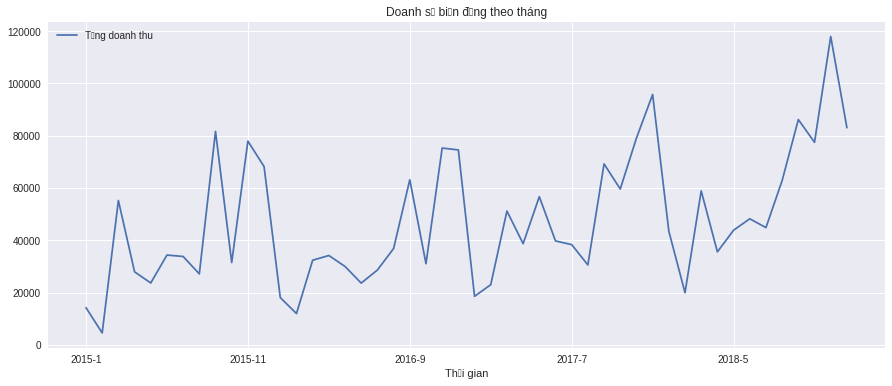

In [22]:
total_sales = df

total_sales = year_month_sales.reset_index(name='Tổng doanh thu')

total_sales['year_month'] = 0
for i in range(len(total_sales)):
  total_sales['year_month'][i] = str(total_sales['year'][i]) + '-' + str(total_sales['month'][i])

total_sales = total_sales.drop(['year', 'month'], axis = 1)


total_sales.index = total_sales['year_month']

total_sales.plot(figsize=(15, 6))
plt.title("Doanh số biến động theo tháng")
plt.xlabel('Thời gian')

plt.show()

**Doanh thu trung bình trong 3 tháng gần nhất**



In [23]:
total_mean = df

total_mean = year_month_sales.reset_index(name='mean_sales')

total_mean = total_mean.iloc[len(total_mean) - 3: len(total_mean)]
print('Doanh thu trung bình trong 3 tháng gần nhất:', total_mean['mean_sales'].mean())

Doanh thu trung bình trong 3 tháng gần nhất: 92805.55833333333


# Vẽ biểu đồ doanh số bán hàng theo quý và cho biết quý nào có tổng doanh số cao nhất?

**Vẽ doanh số bán hàng theo quý**

In [24]:
quarter_sales = df

quarter_sales = year_month_sales.reset_index(name='Doanh số bán hàng')

quarter_year = pd.DataFrame()
index = 0
quarter = 0
while index < len(quarter_sales):
  quarter = (quarter + 1) if quarter < 4 else 1
  total_sales = 0.0
  for i in range(3):
    total_sales += quarter_sales['Doanh số bán hàng'][index]
    index += 1
  quarter_year = quarter_year.append(pd.DataFrame({
      'quarter': [str(quarter) + '-' + str(quarter_sales['year'][index - 1])],
      'Doanh số bán hàng': total_sales
  }), ignore_index = True)

fig = px.pie(quarter_year, values=quarter_year['Doanh số bán hàng'], names=quarter_year['quarter'], title='Doanh số bán hàng theo quý',
             width = 700, height = 500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Quý có tổng doanh số cao nhất**

In [25]:
print('Quý có tổng doanh số cao nhất', quarter_year.max())

Quý có tổng doanh số cao nhất quarter                  4-2018
Doanh số bán hàng    278416.675
dtype: object


# Tính thời gian trung giao hàng trung bình (ship date - order date) theo từng tháng và vẽ biểu đồ mô tả sự biến thiên của con số này.

**Tính thời gian trung giao hàng trung bình**

In [27]:
#Tạo thêm 1 cột Thời gian giao hàng trung bình

df['Ship_Average_Time'] = ''
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,day,month,year,Ship_Average_Time
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,3,1,2015,
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,4,1,2015,
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,4,1,2015,
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,4,1,2015,
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,5,1,2015,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1298,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,30,12,2018,
906,907,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,30,12,2018,
645,646,CA-2018-126221,2018-12-30,2019-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,30,12,2018,
908,909,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,30,12,2018,


In [30]:
#Tính thời gian giao hàng trung bình

average_ship = df
average_ship['Ship_Average_Time'] = average_ship['Ship Date'] - average_ship['Order Date']
average_ship = average_ship.groupby(['year', 'month'])['Ship_Average_Time'].mean().reset_index()

print('Thời gian giao hàng trung bình')

df

Thời gian giao hàng trung bình


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,day,month,year,Ship_Average_Time
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,3,1,2015,4 days
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,4,1,2015,4 days
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,4,1,2015,4 days
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,4,1,2015,4 days
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,5,1,2015,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1298,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,30,12,2018,4 days
906,907,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,30,12,2018,4 days
645,646,CA-2018-126221,2018-12-30,2019-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,30,12,2018,6 days
908,909,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,30,12,2018,4 days


**Biểu đồ mô tả sự biến thiên của thời gian giao hàng trung bình**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 7901 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 7915 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 7901 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 7915 missing from current font.



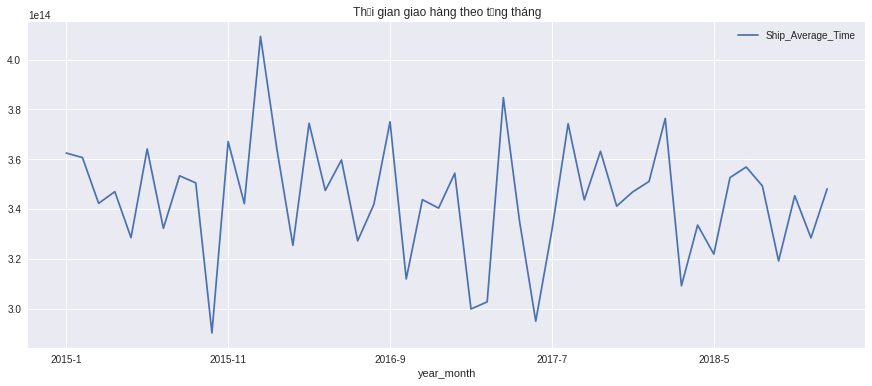

In [29]:
average_ship['year_month'] = 0
for i in range(len(average_ship)):
  average_ship['year_month'][i] = str(average_ship['year'][i]) + '-' + str(average_ship['month'][i])

average_ship = average_ship.drop(['year', 'month'], axis = 1)

average_ship.index = average_ship['year_month']

average_ship.plot(figsize=(15, 6))
plt.title("Thời gian giao hàng theo từng tháng")
plt.show()

# Vẽ biểu đồ thể hiện sức mua theo từng thành phố. Cho biết top 3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất

**Vẽ biểu đồ thể hiện sức mua theo từng thành phố**

In [33]:
#Thống kê sức mua theo từng thành phố

sales_cities=df.groupby(['City']).sum().sort_values('Sales',ascending=False)
sales_cities=sales_cities[['Sales']].round(2)
sales_cities.reset_index(inplace=True)
sales_cities

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
...,...,...
524,Ormond Beach,2.81
525,Pensacola,2.21
526,Jupiter,2.06
527,Elyria,1.82


Text(0, 0.5, 'Revenu')

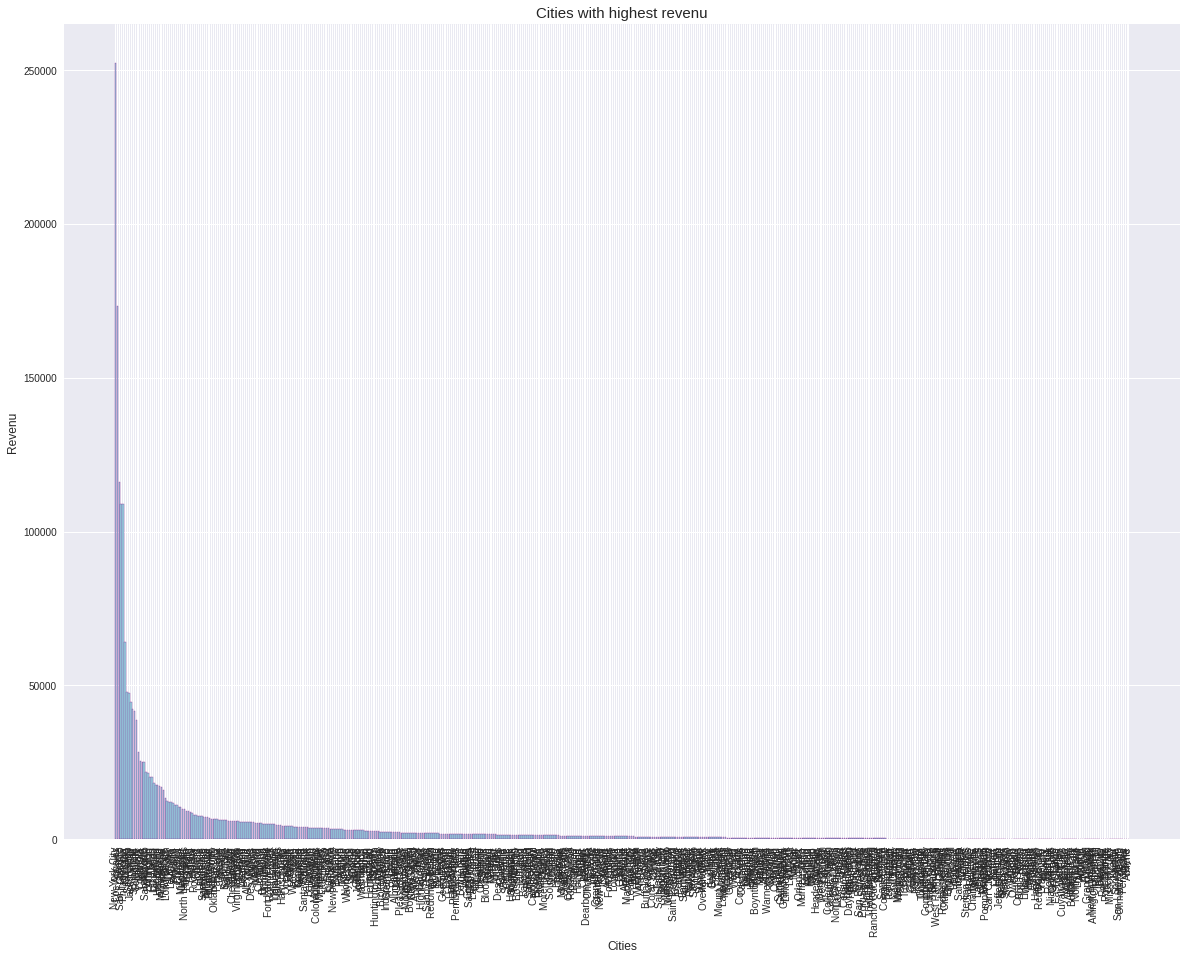

In [35]:
#Vẽ biểu đồ thể hiện sức mua theo từng thành phố

plt.figure(figsize=(20,15))
plt.bar(sales_cities['City'],sales_cities['Sales'],color='#95dee3',edgecolor='purple')
plt.xticks(rotation='vertical')
plt.title('Cities with highest revenu',fontsize=15)
plt.xlabel('Cities',fontsize=12)
plt.ylabel('Revenu',fontsize=12)

**Top 3 thành phố có sức mua cao nhất và top 3 thành phố có sức mua thấp nhất**

In [37]:
print('3 thành phố có sức mua cao nhất')
print(sales_cities.head(3))

print('3 thành phố có sức mua thấp nhất')
print(sales_cities.tail(3))

3 thành phố có sức mua cao nhất
            City      Sales
0  New York City  252462.55
1    Los Angeles  173420.18
2        Seattle  116106.32
3 thành phố có sức mua thấp nhất
        City  Sales
526  Jupiter   2.06
527   Elyria   1.82
528  Abilene   1.39


# Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state) và cho biết trung bình doanh số của 5 bang dẫn đầu về sức mua

**Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state)**

In [62]:
#Tỉ trọng doanh số theo bang

density_states = df
density_states = density_states.groupby(['State'])['Sales'].sum().reset_index(name='sale').sort_values('sale')

fig = px.pie(density_states, values=density_states['sale'], names=density_states['State'], title='Tỉ trọng doanh số theo bang',
             width = 700, height = 500)
fig.update_traces(textposition='inside', textinfo='percent + label')
fig.show()

**Trung bình doanh số của 5 bang dẫn đầu về sức mua**

In [44]:
#Thống kê doanh số theo bang

mean_states=df.groupby(['State']).mean().sort_values('State',ascending=False).head(5)
mean_states=mean_states[['Sales']].round(2)
mean_states.reset_index(inplace=True)

mean_states

,State,Sales
0,Wyoming,1603.14
1,Wisconsin,296.89
2,West Virginia,302.46
3,Washington,268.27
4,Virginia,315.34


# Cho biết các bang dẫn đầu doanh số theo từng vùng (east, west, south, central,..)

In [58]:
reg_states = df
reg_states = reg_states.groupby(['Region', 'State'])['Sales'].sum().reset_index().sort_values(by = ['Region', 'Sales'], ascending = False)
for region in reg_states['Region'].unique():
  print(reg_states[reg_states['Region'] == region].head(1))

   Region       State        Sales
39   West  California  446306.4635
   Region    State      Sales
29  South  Florida  88436.532
   Region     State       Sales
21   East  New York  306361.147
     Region  State        Sales
11  Central  Texas  168572.5322


# Cho biết top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất

**Cho biết top 3 sản phẩm có doanh thu cao nhất**

In [54]:
top_products=df.groupby(['Product Name']).sum().sort_values('Sales',ascending=False).head(3)
top_products=top_products[['Sales']].round(2)
top_products.reset_index(inplace=True)
top_products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.82
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48


**Cho biết top 3 sản phẩm có doanh thu thấp nhất**

In [57]:
bad_products=df.groupby(['Product Name']).sum().sort_values('Sales',ascending=False).tail(3)
bad_products=bad_products[['Sales']].round(2)
bad_products.reset_index(inplace=True)
bad_products

,Product Name,Sales
0,Xerox 20,6.48
1,Avery 5,5.76
2,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.62


# Vẽ biểu đồ thể hiện tỉ trọng doanh số của từng category

In [63]:
density_cat = df
density_cat = density_cat.groupby(['Category'])['Sales'].sum().reset_index(name='total_sales').sort_values('total_sales')

fig = px.pie(density_cat, values = density_cat['total_sales'], names = density_cat['Category'], title = 'Tỉ trọng doanh số của từng category',
             width = 700, height = 500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()